In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
# Parameters
Vt = 0.3
Ca = 20
Cb = 35
Ka = 14
Kb = 20.72
period = 50
reg_delay = 0.4
mux_delay = 0.4
epsilon = 1e-12 # avoid divide by 0
resolution = 1e-3

In [3]:
tmp = period*2 - (reg_delay + mux_delay)

In [4]:
print("constraint: ", tmp)

constraint:  99.2


In [5]:
# Vdd_A, Vdd_B, power
Vdd_A_list = []
Vdd_B_list = np.arange(0.6, 1.0, resolution)
power_list = []

In [6]:
for i in range(len(Vdd_B_list)):
    Vdd_B = Vdd_B_list[i]
    Vdd_A = Vt + Ka/(tmp - Kb/(Vdd_B-Vt+epsilon) + epsilon)
    Vdd_A_list.append(Vdd_A)
    
    # P_A + P_B
    power = (Ca*(Vdd_A**2) + Cb*(Vdd_B**2)) * 10
    power_list.append(power)
    if i % 100 == 0:
        print("iteration {}: ".format(i))
        print("Vdd_A = {:.5f} V".format(Vdd_A))
        print("Vdd_B = {:.5f} V".format(Vdd_B))
        print("Power = {:.5f} uW".format(power))
        print("========================")


min_power = min(power_list)
index = power_list.index(min_power)



print("Final result: ")
print("Vdd_A = {:.5f} V".format(Vdd_A_list[index]))
print("Vdd_B = {:.5f} V".format(Vdd_B_list[index]))
print("power = {:.5f} uW".format(power_list[index]))

iteration 0: 
Vdd_A = 0.76460 V
Vdd_B = 0.60000 V
Power = 242.92317 uW
iteration 100: 
Vdd_A = 0.59536 V
Vdd_B = 0.70000 V
Power = 242.39038 uW
iteration 200: 
Vdd_A = 0.54238 V
Vdd_B = 0.80000 V
Power = 282.83571 uW
iteration 300: 
Vdd_A = 0.51649 V
Vdd_B = 0.90000 V
Power = 336.85339 uW
Final result: 
Vdd_A = 0.66423 V
Vdd_B = 0.64100 V
power = 232.04793 uW


Text(0.5, 1.0, 'Vdd_A & Vdd_B')

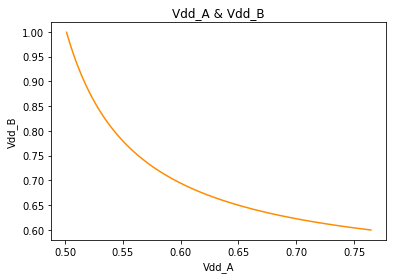

In [7]:
plt.plot(Vdd_A_list, Vdd_B_list, color='darkorange')
plt.xlabel('Vdd_A')
plt.ylabel('Vdd_B')
plt.title('Vdd_A & Vdd_B')

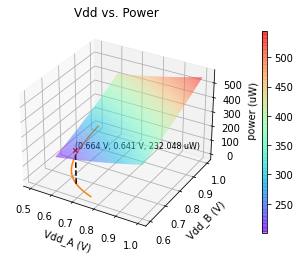

In [8]:
fig = plt.figure()
ax = plt.axes(projection='3d')
xx = np.arange(0.6, 1.0, resolution)
yy = np.arange(0.6, 1.0, resolution)
X, Y = np.meshgrid(xx, yy)
Z = (Ca*(X**2) + Cb*(Y**2))*10


# plot surface
surface = ax.plot_surface(X, Y, Z, cmap='rainbow', alpha=0.5)
rect = [0.85, 0.15, 0.013, 0.7] 
cbar_ax = fig.add_axes(rect)
fig.colorbar(surface, cax=cbar_ax, orientation='vertical', spacing='uniform')

# plot constraint
ax.plot(Vdd_A_list, Vdd_B_list)

# plot optimum value
x = Vdd_A_list[index]
y = Vdd_B_list[index]
z = power_list[index]
ax.scatter(x, y, z, marker='x', c='r')


ax.plot([x, x],
        [y, y],
        [0, z], color='black', linestyle='dashed')

ax.text(x, y, z, f'({x:.3f} V, {y:.3f} V, {z:.3f} uW)', color='black', fontsize=8, va='bottom')

ax.set_xlabel('Vdd_A (V)')
ax.set_ylabel('Vdd_B (V)')
ax.set_zlabel('power (uW)')
ax.set_title("Vdd vs. Power")
plt.show()